<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_3_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
외울거

1. sklearn
선형 회귀 사용법
다항 회귀 사용법
선형 회귀 모델 기울기, 절편 출력하는 방법


#데이터 생성

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.9746459963987609

#원래 가지고 있던 데이터에 많이 벗어난 데이터 입력 시 문제점

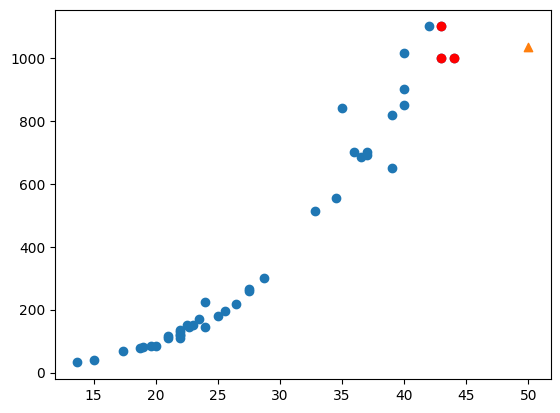

In [4]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[150]])
pred = knr.predict([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], color = 'red')
plt.scatter(50,pred, marker = '^')
plt.show()

#선형 회귀

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(train_input, train_target)

0.939846333997604

In [6]:
print(lr.coef_, lr.intercept_) #ax+b에서 a를 coefficient, weight라고 부름.

[39.01714496] -709.0186449535477


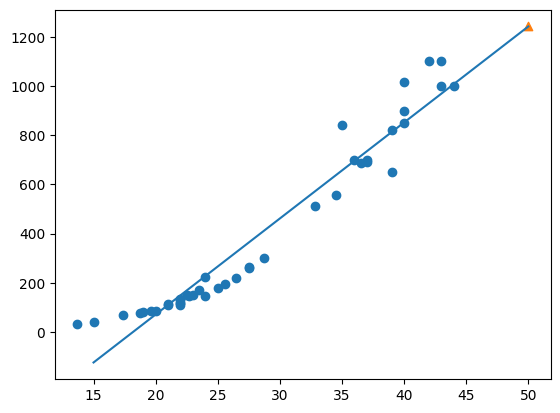

In [7]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker = '^')

plt.show()

In [11]:
#점수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


#다항 회귀

In [12]:
#제곱 항을 만들어서 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [14]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


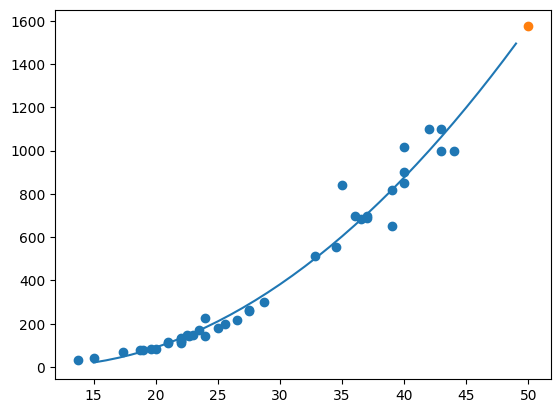

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

point = np.arange(15,50)
plt.plot(point, point ** 2 * lr.coef_[0] + point * lr.coef_[1] + lr.intercept_)
plt.scatter(50, lr.predict([[50**2, 50]]))
plt.show()

#다항회귀 - 3차 (내가 그냥 해본거)

In [28]:
train_poly = np.column_stack((train_input ** 3, train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 3, test_input ** 2, test_input))

In [30]:
print(train_poly.shape, test_poly.shape)

(42, 3) (14, 3)


In [31]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(test_poly, test_target)

0.9588363727422973

In [33]:
lr.predict([[50**3, 50 ** 2, 50]])

array([1379.41727785])

In [34]:
print(lr.coef_, lr.intercept_)

[-2.93594164e-02  3.54762430e+00 -9.05932876e+01] 709.9479507456624


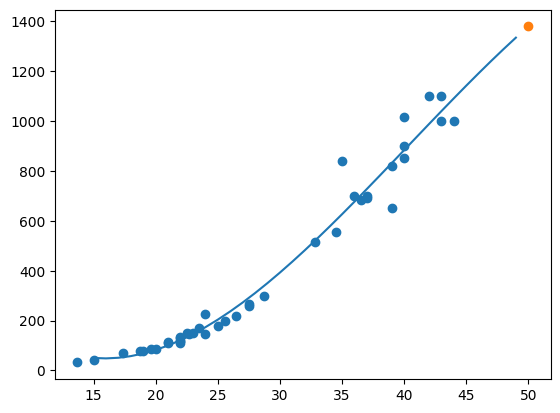

In [40]:
plt.scatter(train_input, train_target)

point = np.arange(15,50)
plt.plot(point, point**3*lr.coef_[0] + point**2*lr.coef_[1] + point * lr.coef_[2] + lr.intercept_)
plt.scatter(50, lr.predict([[50**3, 50**2, 50]]))
plt.show()